<a href="https://colab.research.google.com/github/nuruzzaman99/Artificial-Intelligence/blob/main/Skin_lession_classification_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import all Libraries needed

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from matplotlib import pyplot
from matplotlib import image
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import cv2
import os

#Mount drive with colab

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

'''from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Capstone files/release_v0-20210711T044822Z-001.zip', 'r') as zip:
  zip.extractall('/content/drive/MyDrive/Capstone files/dataset')'''

#Import and load data from drive

In [ ]:
meta_data = pd.read_csv("/content/drive/MyDrive/Capstone files/dataset/release_v0/meta/meta.csv")

test_index = pd.read_csv("/content/drive/MyDrive/Capstone files/dataset/release_v0/meta/test_indexes.csv")
train_index = pd.read_csv("/content/drive/MyDrive/Capstone files/dataset/release_v0/meta/train_indexes.csv")
valid_index = pd.read_csv("/content/drive/MyDrive/Capstone files/dataset/release_v0/meta/valid_indexes.csv")

In [ ]:
meta_data.head(4)

,case_num,diagnosis,seven_point_score,pigment_network,streaks,pigmentation,regression_structures,dots_and_globules,blue_whitish_veil,vascular_structures,level_of_diagnostic_difficulty,elevation,location,sex,management,clinic,derm,case_id,notes
0,1,basal cell carcinoma,0,absent,absent,absent,absent,absent,absent,arborizing,medium,nodular,abdomen,female,excision,NEL/NEL025.JPG,NEL/Nel026.jpg,NaN,NaN
1,2,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,absent,low,palpable,head neck,female,excision,NEL/NEL027.JPG,NEL/Nel028.jpg,NaN,NaN
2,3,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,arborizing,medium,palpable,head neck,female,excision,NEL/Nel032.jpg,NEL/Nel033.jpg,NaN,NaN
3,4,basal cell carcinoma,4,absent,absent,absent,blue areas,irregular,present,within regression,low,palpable,lower limbs,male,excision,NEL/NEL034.JPG,NEL/Nel035.jpg,NaN,NaN


#Rename column 'indexs' to 'case_num'

In [ ]:
test_index.rename(index=str, columns={'indexes': 'case_num'}, inplace=True)
train_index.rename(index=str, columns={'indexes': 'case_num'}, inplace=True)
valid_index.rename(index=str, columns={'indexes': 'case_num'}, inplace=True)

#Separate data into Test, Train and Validation data by Case_num

In [ ]:
test_data = pd.merge(meta_data, test_index , on = 'case_num')
train_data = pd.merge(meta_data, train_index , on = 'case_num')
valid_data = pd.merge(meta_data, valid_index , on = 'case_num')

In [ ]:
test_data.head(3)

,case_num,diagnosis,seven_point_score,pigment_network,streaks,pigmentation,regression_structures,dots_and_globules,blue_whitish_veil,vascular_structures,level_of_diagnostic_difficulty,elevation,location,sex,management,clinic,derm,case_id,notes
0,3,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,arborizing,medium,palpable,head neck,female,excision,NEL/Nel032.jpg,NEL/Nel033.jpg,NaN,NaN
1,6,basal cell carcinoma,1,absent,absent,diffuse irregular,absent,absent,absent,absent,high,palpable,head neck,female,excision,NEL/Nel038.jpg,NEL/Nel039.jpg,NaN,NaN
2,8,basal cell carcinoma,4,absent,absent,diffuse irregular,absent,irregular,present,absent,high,nodular,head neck,male,excision,NEL/Nel084.jpg,NEL/Nel085.jpg,NaN,NaN


In [ ]:
print("Meta data count: ", meta_data.shape[0])
print("Test data count: ", test_data.shape[0])
print("Train data count: ", train_data.shape[0])
print("Valid data count: ", valid_data.shape[0])

Meta data count:  1011
Test data count:  395
Train data count:  412
Valid data count:  203


#Test Image data load

In [ ]:
#Set image size
im_size = (400, 400)

  0%|          | 0/395 [00:00<?, ?it/s]

(395, 400, 400, 3)


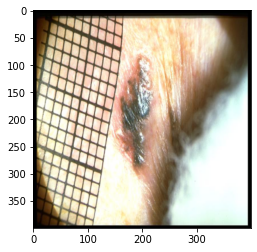

In [ ]:
X_test_clinic = []
for i in tqdm(range(test_data.shape[0])):
  test_clinic_img = image.imread('/content/drive/MyDrive/Capstone files/dataset/release_v0/images/'+test_data['clinic'][i])
  test_clinic_img = cv2.resize(test_clinic_img, (im_size), interpolation = cv2.INTER_AREA)
  X_test_clinic.append(test_clinic_img)


plt.imshow(X_test_clinic[3])
X_test_clinic = np.array(X_test_clinic)
print(X_test_clinic.shape)

  0%|          | 0/412 [00:00<?, ?it/s]

(412, 400, 400, 3)


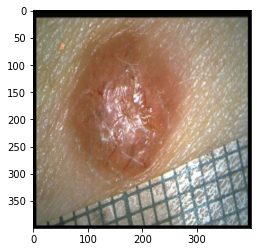

In [ ]:
X_train_clinic = []
for i in tqdm(range(train_data.shape[0])):
  train_clinic_img = image.imread('/content/drive/MyDrive/Capstone files/dataset/release_v0/images/'+train_data['clinic'][i])
  train_clinic_img = cv2.resize(train_clinic_img, (im_size), interpolation = cv2.INTER_AREA)
  X_train_clinic.append(train_clinic_img)


plt.imshow(X_train_clinic[3])
X_train_clinic = np.array(X_train_clinic)
print(X_train_clinic.shape)

  0%|          | 0/203 [00:00<?, ?it/s]

(203, 400, 400, 3)


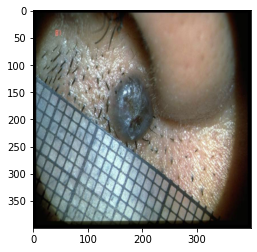

In [ ]:
X_valid_clinic = []
for i in tqdm(range(valid_data.shape[0])):
  valid_clinic_img = image.imread('/content/drive/MyDrive/Capstone files/dataset/release_v0/images/'+valid_data['clinic'][i])
  valid_clinic_img = cv2.resize(valid_clinic_img, (im_size), interpolation = cv2.INTER_AREA)
  X_valid_clinic.append(valid_clinic_img)


plt.imshow(X_valid_clinic[3])
X_valid_clinic = np.array(X_valid_clinic)
print(X_valid_clinic.shape)

#Normalize image data

In [ ]:
X_test_clinic = X_test_clinic / 255.0
X_train_clinic = X_train_clinic / 255.0
X_valid_clinic = X_valid_clinic / 255.0

#Create Y for model
#Drop all column but 7point column

In [ ]:
Y_test_clinic = test_data.drop(['case_num', 'seven_point_score', 'pigment_network', 'streaks', 'pigmentation', 'regression_structures', 'dots_and_globules', 'blue_whitish_veil', 'vascular_structures', 'level_of_diagnostic_difficulty', 'elevation', 'location', 'sex', 'management', 'clinic', 'derm', 'case_id', 'notes'], axis = 1)
Y_train_clinic = train_data.drop(['case_num', 'seven_point_score', 'pigment_network', 'streaks', 'pigmentation', 'regression_structures', 'dots_and_globules', 'blue_whitish_veil', 'vascular_structures', 'level_of_diagnostic_difficulty', 'elevation', 'location', 'sex', 'management', 'clinic', 'derm', 'case_id', 'notes'], axis = 1)
Y_valid_clinic = valid_data.drop(['case_num', 'seven_point_score', 'pigment_network', 'streaks', 'pigmentation', 'regression_structures', 'dots_and_globules', 'blue_whitish_veil', 'vascular_structures', 'level_of_diagnostic_difficulty', 'elevation', 'location', 'sex', 'management', 'clinic', 'derm', 'case_id', 'notes'], axis = 1)

In [ ]:
Y_test_clinic.head(3)

,diagnosis
0,basal cell carcinoma
1,basal cell carcinoma
2,basal cell carcinoma


In [ ]:
Y_test_clinic.shape

(395, 1)